In [2]:
import numpy as np
from scipy.ndimage.filters import minimum_filter
import matplotlib.pyplot as plt 

C:\Users\TQC User\AppData\Local\Temp\ipykernel_23036\3913532573.py:2: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import minimum_filter


In [22]:
data = np.array([[2, 100, 100, -5],
        [-10, 9, 180, 0],
        [112, 10, 111, 100],
        [50, 110, 50, 140]])


minima = (data == minimum_filter(data, len(data), mode='constant', cval=0.0))
# print(data)
# print(minima)

print(minima)
res = np.where(1 == minima)
print(res[0][1])

[[False False False  True]
 [ True False False False]
 [False False False False]
 [False False False False]]
1


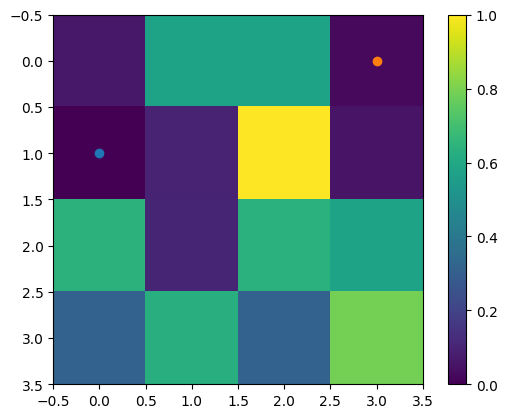

In [8]:
plt.figure() 
plt.imshow(data)
plt.scatter(0,1)
plt.scatter(3,0) 
plt.colorbar() 
plt.show() 

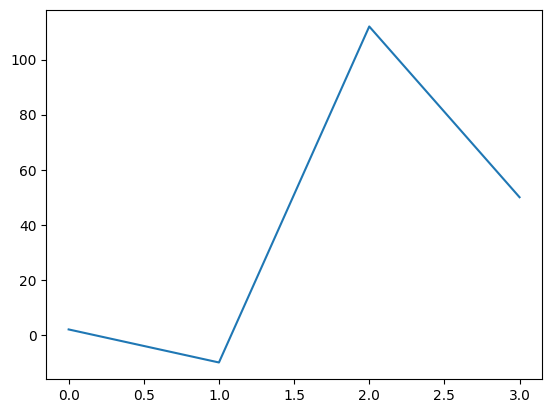

In [11]:
plt.plot(data[:,0])

## Testing the neighborhood implementation

In [1]:
from vortex_neighborhood_scaps import GPETimeEv as gpev

import matplotlib.pyplot as plt
import numpy as np
#from scipy.ndimage import label, minimum_filter
from skimage.feature import peak_local_max

To Do: 

- Create animation that includes a dot that tracks the vortex centers during the animation - convert from coordinates in searchArea to coordinates in the entire image 
    - Find the way to add start_ind to all of the vortices - maybe after the array is formed - also want to make sure you adjust for each entry since start_ind changes as the
    window is moved 
    - Fix the animation so that the vortex markers appear - maybe start by making snapshots and the vortex arrray the same length 

For run time purposes: 
- Else try manually making the window part of the animation more spread out by adding this array to the existing 1D axes with wider points then performing meshgrid 

In [2]:
g = gpev(L = 50, dtcoef = 0.05, dim = 2, numImagSteps= 500, numRealSteps = 1000, dist = 3, antiV = False) 


Total Imag Time:  52.37189245223999
y:  0.0
x:  32.72000000000003
y:  0.0
x:  32.72000000000003
y:  -2.0
x:  32.72000000000003
y:  -2.0
x:  33.72000000000003


In [3]:
print(g.angle_arr*180/np.pi)
print(g.dist_arr)

[ 0.          0.         -3.49783511 -3.39434957]
[3.1953125  3.1953125  3.20127614 3.29875585]


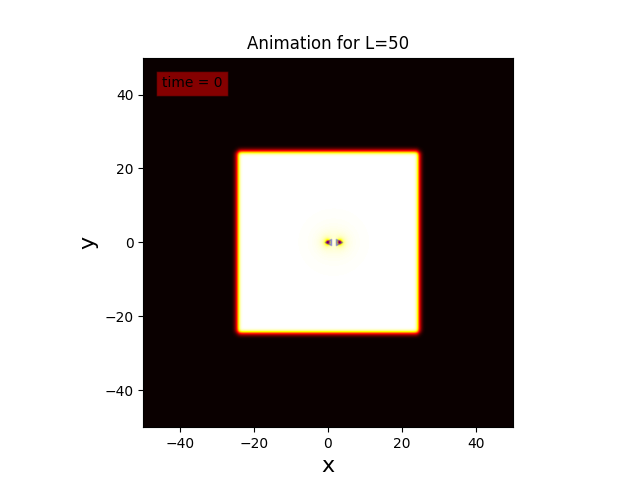

In [4]:
%matplotlib widget
g.animatepsi2d_show2() 

In [5]:
import matplotlib.animation as animation

In [15]:
def animatepsi2d_show():
    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(g.snapshots[0]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2],cmap = plt.cm.hot)
    v1 = plt.scatter(g.xi[0][0][int(g.image_vortex_locs[0][0][0])], g.xi[0][0][int(g.image_vortex_locs[0][0][1])], color = 'blue', marker = '<', s = 20, alpha = 0.3)
    v2 = plt.scatter(g.xi[0][0][int(g.image_vortex_locs[0][1][0])], g.xi[0][0][int(g.image_vortex_locs[0][1][1])], color = 'blue', marker = '>', s = 20, alpha = 0.3)
    
    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')
    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    # plt.contour(self.xi[0], self.xi[1], self.Vs)
    plt.title(f'Animation for L={g.L}')

    def animate(i): 
        data.set_data(np.abs(g.snapshots[i]))
        v1.set_offsets([g.xi[0][0][int(g.image_vortex_locs[i][0][0])], g.xi[0][0][int(len(g.xi[0][0])-g.image_vortex_locs[i][0][1])]])

        ##self.image_vortex_locs[:,0][i]
        ##v2.set_offsets(self.image_vortex_locs[:,-1][i])
        v2.set_offsets([g.xi[0][0][int(g.image_vortex_locs[i][1][0])], g.xi[0][0][int(len(g.xi[0][0])-g.image_vortex_locs[i][1][1])]])
        time_text.set_text('time = %.1d' % g.time_tracking[i])
        return data, v1, v2, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(g.image_vortex_locs), blit = True)

    plt.show() 
    anim.save('scatter.mp4')
    return anim

In [18]:
print(len(g.snapshots))
print(len(g.image_vortex_locs))
print(len(g.time_tracking))

21
21
20


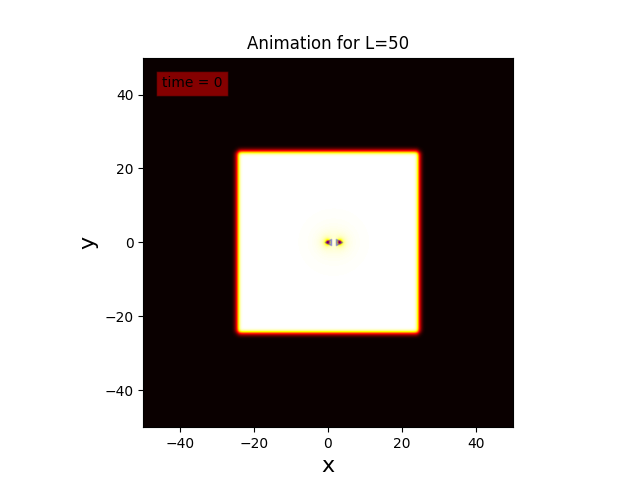

IndexError: index 20 is out of bounds for axis 0 with size 20

In [16]:
%matplotlib widget 
animatepsi2d_show() 

In [30]:
print(g.image_vortex_locs[0][1][0])
print(g.image_vortex_locs)

543.72
[[[511.   512.  ]
  [543.72 512.  ]]

 [[511.   512.  ]
  [543.72 512.  ]]

 [[511.   511.  ]
  [543.72 513.  ]]

 [[511.   511.  ]
  [544.72 513.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   509.  ]
  [544.72 515.  ]]]


In [ ]:
from matplotlib import cm
from celluloid import Camera

In [54]:
print(len(g.snapshots))
print(len(g.image_vortex_locs))

41
42


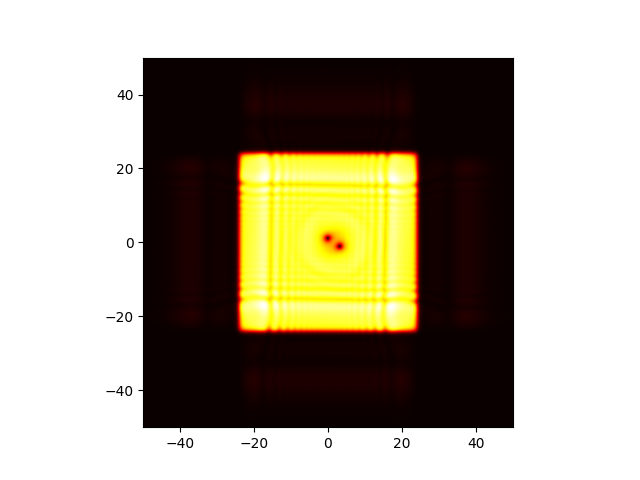

In [77]:

## Open questions for this: does the animation look the same upon removing the vortex labels? Why does the window look more yellow? 
%matplotlib widget

camera = Camera(plt.figure())
data = plt.imshow(np.abs(g.snapshots[0]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2],cmap = plt.cm.hot)
##v2 = plt.scatter(g.xi[0][0][int(g.image_vortex_locs[0][1][0])], g.xi[0][0][int(g.image_vortex_locs[0][1][1])], color = 'blue', marker = '>', s = 20, alpha = 0.3)
for i in range(len(g.snapshots)):
    #points += 0.1 * (np.random.random((2, numpoints)) - .5)
    plt.imshow(np.abs(g.snapshots[i]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap=plt.cm.hot)
   # plt.scatter(g.xi[0][0][int( g.image_vortex_locs[i][0][0])], g.xi[0][0][int(len(g.xi[0][0]) - g.image_vortex_locs[i][0][1])], color = 'blue', marker = '<', s = 20, alpha = 0.3)
    #plt.scatter(g.xi[0][0][int( g.image_vortex_locs[i][1][0])], g.xi[0][0][int(len(g.xi[0][0]) - g.image_vortex_locs[i][1][1])], color = 'blue', marker = '<', s = 20, alpha = 0.3)
    #int(g.image_vortex_locs[i][0][0])
    camera.snap()
    
anim = camera.animate(blit=True)
plt.show() 
#anim.save('scatter.mp4')

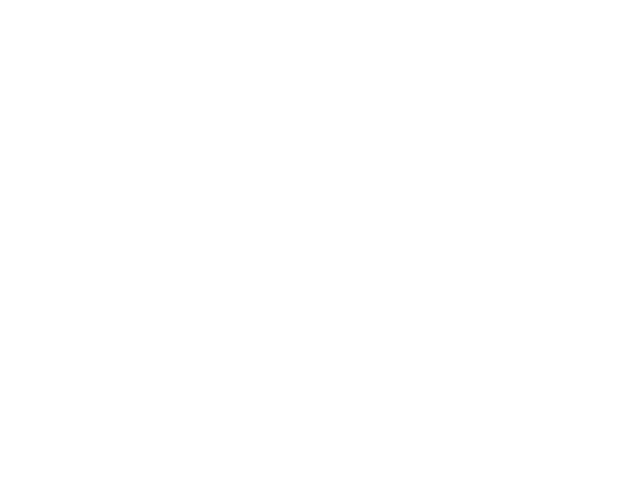

In [74]:
plt.figure() 
plt.show() 

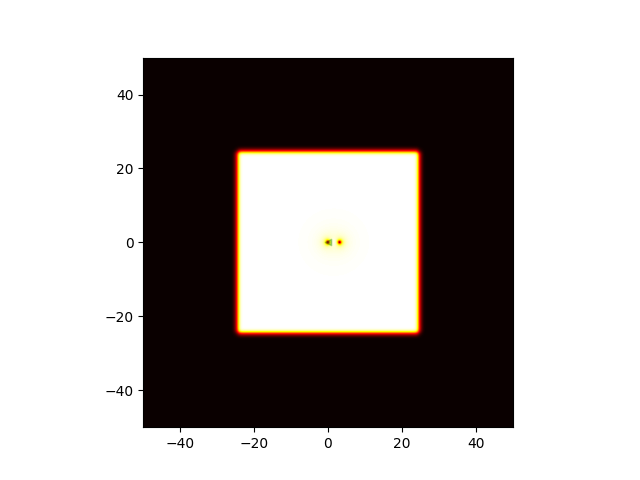

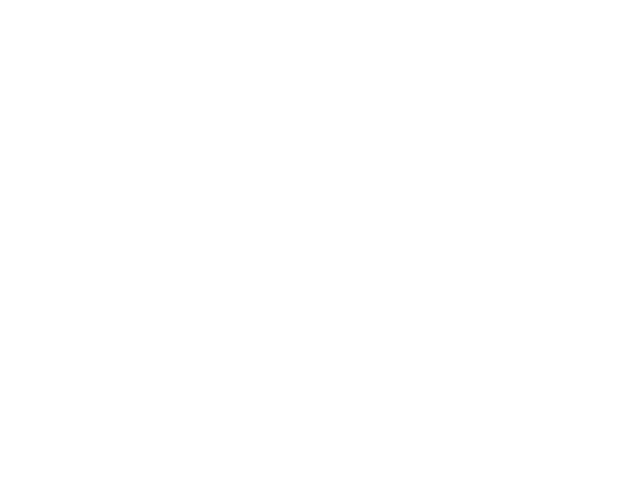

In [73]:
%matplotlib widget

camera = Camera(plt.figure())
fig, ax = plt.subplots()
data = plt.imshow(np.abs(g.snapshots[0]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2],cmap = plt.cm.hot)
v1 = plt.scatter(g.xi[0][0][int(g.image_vortex_locs[0][0][0])], g.xi[0][0][int(g.image_vortex_locs[0][0][1])], color = 'green', marker = '<', s = 20, alpha = 0.3)
#v2 = plt.scatter(g.xi[0][0][int(g.image_vortex_locs[0][1][0])], g.xi[0][0][int(g.image_vortex_locs[0][1][1])], color = 'blue', marker = '>', s = 20, alpha = 0.3)
def animate(i):
    #points += 0.1 * (np.random.random((2, numpoints)) - .5)
    data.set_data(np.abs(g.snapshots[i]))
    plt.scatter(g.xi[0][0][int( g.image_vortex_locs[i][0][0])], g.xi[0][0][int(len(g.xi[0][0]) - g.image_vortex_locs[i][0][1])], color = 'green', marker = '<', s = 20, alpha = 0.3)
    #plt.scatter(g.xi[0][0][int( g.image_vortex_locs[i][1][0])], g.xi[0][0][int(len(g.xi[0][0]) - g.image_vortex_locs[i][1][1])], color = 'blue', marker = '<', s = 20, alpha = 0.3)
    #int(g.image_vortex_locs[i][0][0])
    camera.snap()
    return data

anim = animation.FuncAnimation(fig, animate, frames = len(g.snapshots))
anim2 = camera.animate(blit=True)
plt.show()

# anim.save('scatter.mp4')

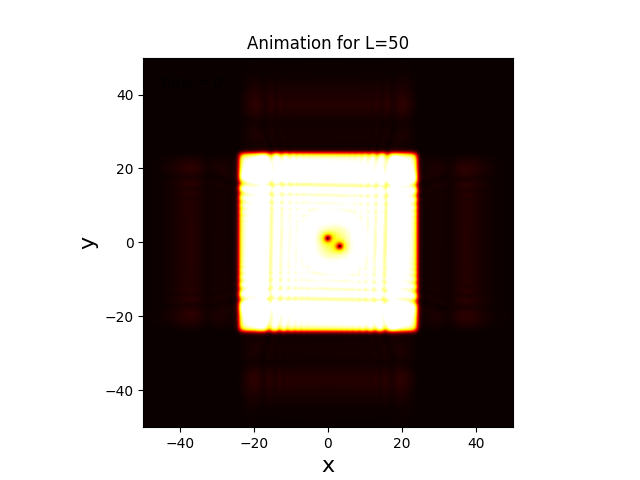

In [59]:
%matplotlib widget
g.animatepsi2d_save('test2.mp4')

In [14]:
print(np.shape(points))

(2, 10)


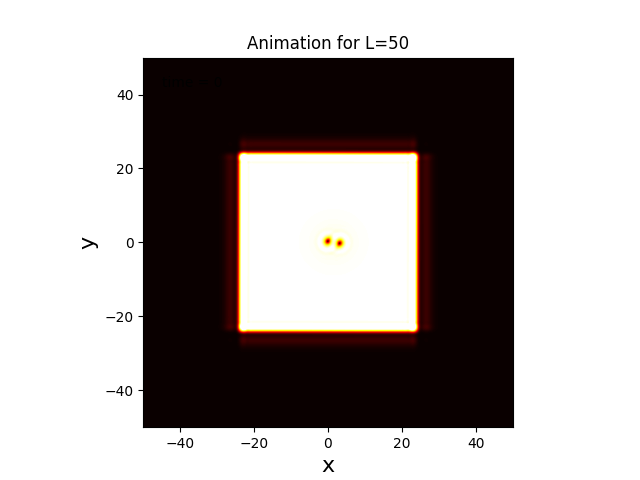

In [5]:
g.animatepsi2d_save() 

In [26]:
print(np.shape(g.image_vortex_locs[:,0]))
print(g.image_vortex_locs[:,0])
print(g.image_vortex_locs[:,-1])
print(g.image_vortex_locs)

(12, 2)
[[511. 512.]
 [511. 512.]
 [511. 511.]
 [511. 511.]
 [511. 510.]
 [511. 510.]
 [511. 510.]
 [511. 509.]
 [511. 509.]
 [511. 508.]
 [511. 508.]
 [511. 507.]]
[[543.72 512.  ]
 [543.72 512.  ]
 [543.72 513.  ]
 [544.72 513.  ]
 [544.72 514.  ]
 [544.72 514.  ]
 [544.72 514.  ]
 [544.72 515.  ]
 [544.72 515.  ]
 [544.72 516.  ]
 [544.72 516.  ]
 [544.72 517.  ]]
[[[511.   512.  ]
  [543.72 512.  ]]

 [[511.   512.  ]
  [543.72 512.  ]]

 [[511.   511.  ]
  [543.72 513.  ]]

 [[511.   511.  ]
  [544.72 513.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   510.  ]
  [544.72 514.  ]]

 [[511.   509.  ]
  [544.72 515.  ]]

 [[511.   509.  ]
  [544.72 515.  ]]

 [[511.   508.  ]
  [544.72 516.  ]]

 [[511.   508.  ]
  [544.72 516.  ]]

 [[511.   507.  ]
  [544.72 517.  ]]]


[[511.   507.  ]
 [544.72 517.  ]]
[ 1.80636048e-10-1.55691275e-10j -3.96682042e-11+1.47564895e-11j
 -1.61695431e-10+1.58044820e-10j ...  1.28047674e-10-4.43043474e-11j
 -1.59694557e-10+1.56584998e-10j -4.28112536e-11+1.71007813e-11j]


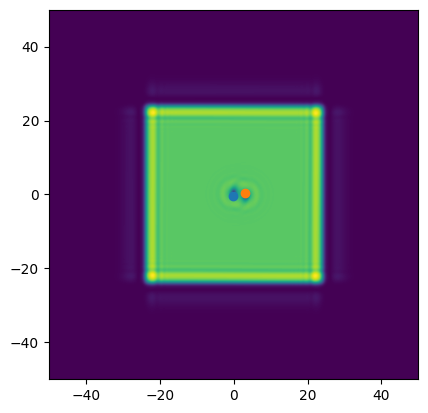

In [12]:
print(g.image_vortex_locs[-1])
print(g.dynpsi[int(g.image_vortex_locs[-1][0][0])])
plt.figure() 
plt.imshow(np.abs(g.dynpsi), extent = [-g.winL//2, g.winL//2, -g.winL//2, g.winL//2])
plt.scatter(g.xi[0][0][int(g.image_vortex_locs[-1][0][0])], g.xi[0][0][int(g.image_vortex_locs[-1][0][1])])
plt.scatter(g.xi[0][0][int(g.image_vortex_locs[-1][1][0])], g.xi[0][0][int(g.image_vortex_locs[-1][1][1])])

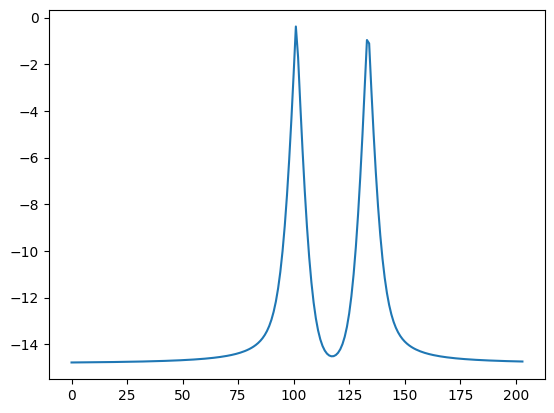

In [4]:
plt.figure() 
plt.plot(-g.searchArea[len(g.searchArea)//2])
plt.show() 

In [9]:
print(g.vort_coords2)

(104, 103)


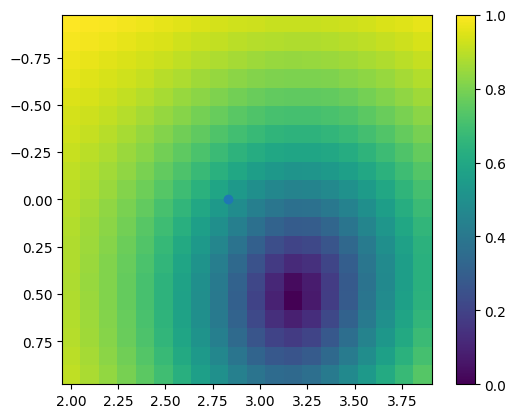

In [3]:


plt.figure() 
plt.imshow(g.searchArea2, extent = [g.xneighborhoodAxis2[0], g.xneighborhoodAxis2[-1], g.yneighborhoodAxis2[-1], g.yneighborhoodAxis2[0]])
for i in range(len(g.minima)):
    plt.scatter(g.xneighborhoodAxis2[g.minima[i][1]], g.yneighborhoodAxis2[g.minima[i][0]])
# plt.scatter(g.xneighborhoodAxis[g.minima[0][1]], g.yneighborhoodAxis[g.minima[0][0]])
# plt.scatter(g.xneighborhoodAxis[g.minima[1][1]], g.yneighborhoodAxis[g.minima[1][0]])
#plt.vlines(0, -0.5, 0.5)
#plt.hlines(0, -0.5, 0.5)
plt.colorbar()
plt.show() 

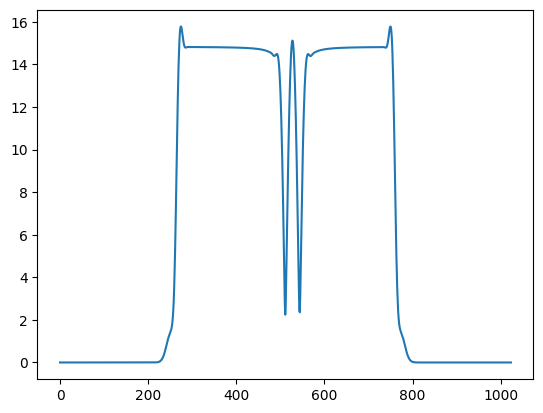

In [6]:
plt.figure() 
plt.plot(np.abs(g.dynpsi[len(g.dynpsi)//2]))

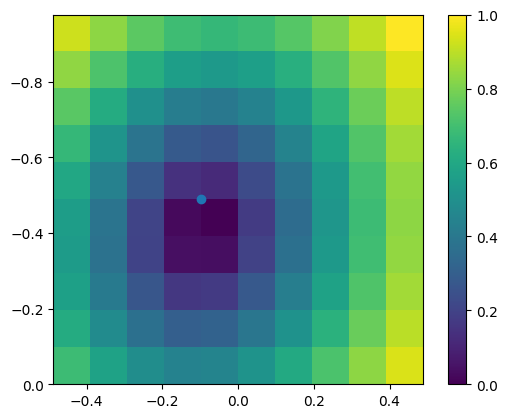

In [3]:
plt.figure() 
plt.imshow(g.searchArea, extent = [g.xneighborhoodAxis[0], g.xneighborhoodAxis[-1], g.yneighborhoodAxis[-1], g.yneighborhoodAxis[0]])
plt.scatter(g.xneighborhoodAxis[g.vort_coords[0]], g.yneighborhoodAxis[g.vort_coords[1]])
#plt.vlines(0, -0.5, 0.5)
#plt.hlines(0, -0.5, 0.5)
plt.colorbar()
plt.show() 

In [8]:
print(len(peak_local_max(-g.searchArea)))

1


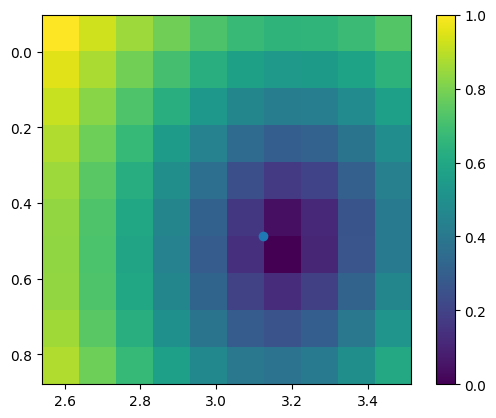

In [4]:
plt.figure() 
plt.imshow(g.searchArea2,extent = [g.xneighborhoodAxis2[0], g.xneighborhoodAxis2[-1], g.yneighborhoodAxis2[-1], g.yneighborhoodAxis2[0]],)
plt.scatter(g.xneighborhoodAxis2[g.vort_coords2[0]], g.yneighborhoodAxis2[g.vort_coords2[1]])
#plt.vlines(3, -0.5, 0.5)
#plt.hlines(0, 2.5, 3.3)
plt.colorbar()
plt.show() 

In [20]:
print(g.neighborhoodAxis2[g.vort_coords2[0][0]])

3.125


In [23]:
print(g.neighborhoodAxis2)

[1.953125   2.05078125 2.1484375  2.24609375 2.34375    2.44140625
 2.5390625  2.63671875 2.734375   2.83203125 2.9296875  3.02734375
 3.125      3.22265625 3.3203125  3.41796875 3.515625   3.61328125
 3.7109375  3.80859375 3.90625   ]


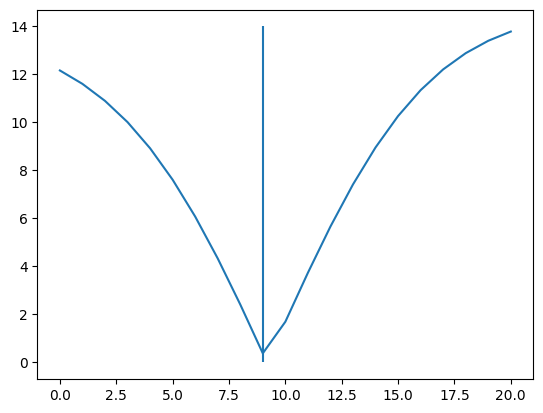

In [33]:
plt.figure() 
plt.plot(g.searchArea[len(g.searchArea)//2])
plt.vlines(9, 0 , 14)
plt.show() 

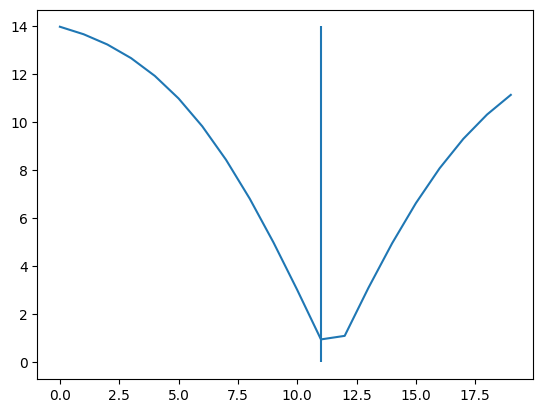

In [10]:
plt.figure() 
plt.plot(g.searchArea2[len(g.searchArea2)//2])
plt.vlines(11, 0 , 14)
plt.show() 

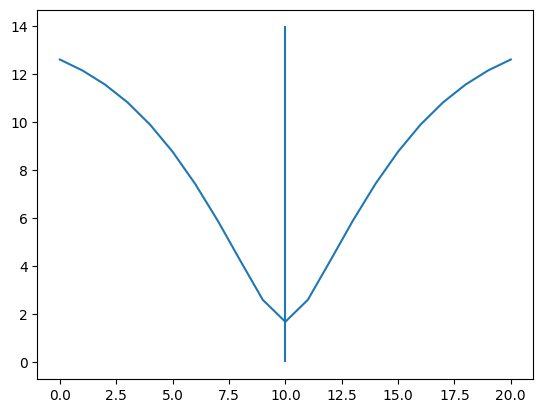

In [27]:
plt.figure() 
plt.plot(g.searchArea[:,len(g.searchArea)//2])
plt.vlines(10, 0 , 14)
plt.show() 

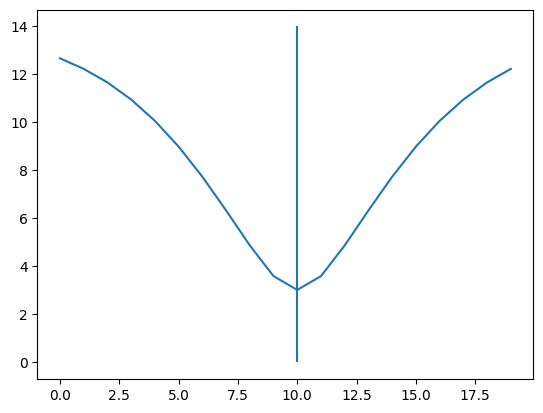

In [11]:
plt.figure() 
plt.plot(g.searchArea2[:,len(g.searchArea2)//2])
plt.vlines(10, 0 , 14)
plt.show() 

In [35]:
print(g.searchArea[0])

[13.4944442  13.37153303 13.24001125 13.10316649 12.9663008  12.83684866
 12.7240495  12.63803261 12.58833029 12.58208096 12.62241438 12.70757045
 12.83109592 12.98306462 13.151896   13.32620129 13.49619811 13.65448355
 13.79619386 13.91872074 14.02119151]


In [4]:
vl = np.array(g.vortex_locs)

In [5]:
print(vl)

[]


In [6]:
plt.figure() 
plt.imshow(g.searchArea)
plt.show() 

AttributeError: 'GPETimeEv' object has no attribute 'searchArea'

<Figure size 640x480 with 0 Axes>

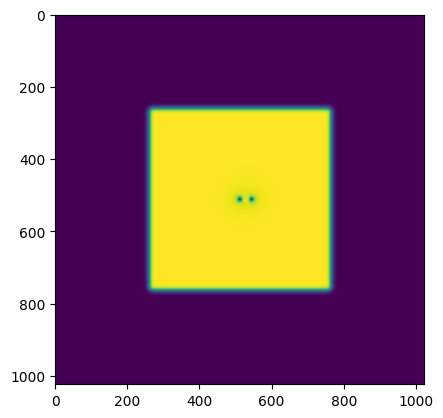

In [6]:
plt.figure() 
plt.imshow(np.abs(g.dynpsi) )
#plt.scatter(vl[-1])
plt.show() 

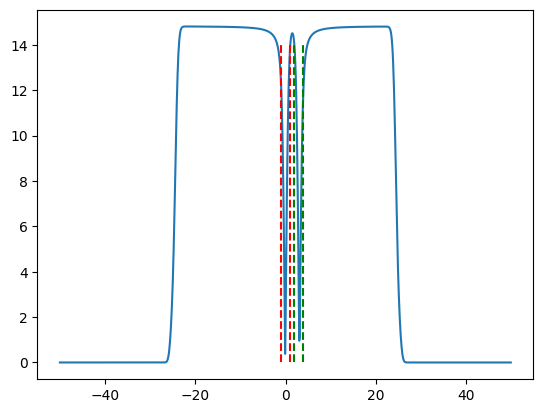

In [7]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.dynpsi)[len(g.dynpsi)//2])
plt.vlines(g.neighborhoodAxis[0], 0, 14, linestyle = '--', color = 'red')
plt.vlines(g.neighborhoodAxis[-1], 0, 14, linestyle = '--', color = 'red')
plt.vlines(g.neighborhoodAxis2[0], 0, 14, linestyle = '--', color = 'green')
plt.vlines(g.neighborhoodAxis2[-1], 0, 14, linestyle = '--', color = 'green')
plt.show() 

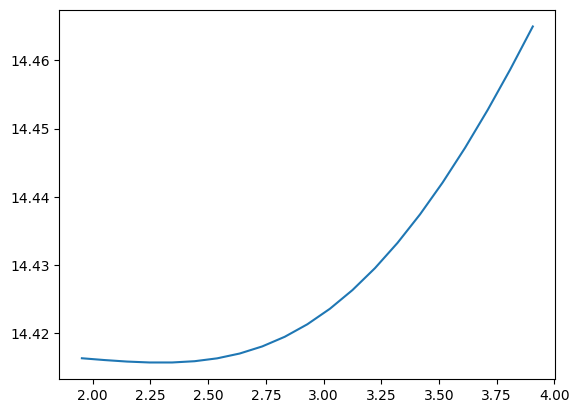

In [11]:
plt.figure()
plt.plot(g.neighborhoodAxis2, np.abs(g.searchArea2)[len(g.searchArea2)//2])
plt.show() 

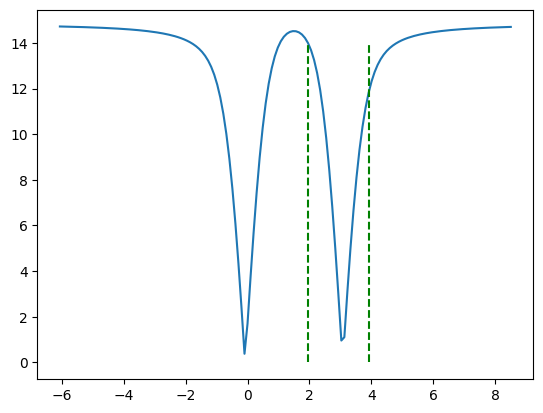

In [10]:
plt.figure() 
plt.plot(g.xi[0][0][450:600], np.abs(g.dynpsi)[len(g.dynpsi)//2][450:600])

plt.vlines(g.neighborhoodAxis2[0], 0, 14, linestyle = '--', color = 'green')
plt.vlines(g.neighborhoodAxis2[-1], 0, 14, linestyle = '--', color = 'green')
plt.show() 